<a href="https://colab.research.google.com/github/nimishagupta1999/Competitive-Programming/blob/master/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy
from textblob import TextBlob
import numpy as np
from tweepy import OAuthHandler
import pandas as pd
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:

class TwitterClient(object): 
    
    def __init__(self): 
        
        
        consumer_key = 'GQOuE0mIoBsfudoVH8hgNNwBy'
        consumer_secret = 'NpfdJXgBCQexlf84LmvaGTZ6N8pdo7RCXeCkKTrz2M4tHcaJgQ'
        access_token = '995189850969063424-EiXbplVYsI7jey1X7tX1HKW4MUTFgiI'
        access_token_secret = 'W7V1qk2cVtk0kbnh0QuXyin9NBTEhPI9VLVeJoW4Vj92F'
  
         
        try: 
             
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
             
            self.auth.set_access_token(access_token, access_token_secret) 
             
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_subjectivity(self,text):
        return TextBlob(text).sentiment.subjectivity
        

        
    def get_polarity(self,text):
        return TextBlob(text).sentiment.polarity
  
    def get_tweet_sentiment(self, tweet): 
        
         
        analysis = TextBlob(self.clean_tweet(tweet)) 
         
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        
         
        tweets = [] 
  
        try: 
             
            fetched_tweets = self.api.search(q = query, count = count) 
  
             
            for tweet in fetched_tweets: 
                 
                parsed_tweet = {} 
  
                 
                parsed_tweet['text'] = self.clean_tweet(tweet.text)
                parsed_tweet['polarity'] = self.get_polarity(tweet.text)
                parsed_tweet['subjectivity'] = self.get_subjectivity(tweet.text)
                parsed_tweet['location'] = tweet.user.location 
                 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                 
                if tweet.retweet_count > 0: 
                     
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
             
            return tweets 
  
        except tweepy.TweepError as e: 
            
            print("Error : " + str(e)) 

def main(): 


   
  api = TwitterClient() 
  query=['cant wait to travel',' go on a holiday','go on a vacation','world tour']
  df=pd.DataFrame(columns=['Tweets','Polarity','Subjectivity','Sentiment','Location'])
  for i in query:
    tweets = api.get_tweets(query = i, count = 200)
    dataf=pd.DataFrame({'Tweets':[tweet['text'] for tweet in tweets],'Polarity':[tweet['polarity'] for tweet in tweets],'Subjectivity':[tweet['subjectivity'] for tweet in tweets],'Sentiment':[tweet['sentiment'] for tweet in tweets],'Location':[tweet['location'] for tweet in tweets]})
    df=df.append(dataf,ignore_index=True)
 
  df.to_csv('twitter_analysis.csv') 
  
 
  #for tweet in tweets:
    #print(tweet)
    
     
     
if __name__ == "__main__": 
     
    main() 

In [0]:
data=pd.read_csv('twitter_analysis.csv')

In [4]:
data.head()

,Unnamed: 0,Tweets,Polarity,Subjectivity,Sentiment,Location
0,0,i cant wait to travel again with you both,0.000000,0.000000,neutral,NaN
1,1,Cant wait to travel the world some more w my o...,0.433333,0.733333,positive,"Inglewood, CA"
2,2,I cant wait to travel the world,0.000000,0.000000,neutral,"New Orleans, LA"
3,3,i cant wait to travel with my friends,0.000000,0.000000,neutral,the bay • fan account
4,4,Day dreaming Cant wait to travel back to Boracay,0.000000,0.000000,neutral,NaN


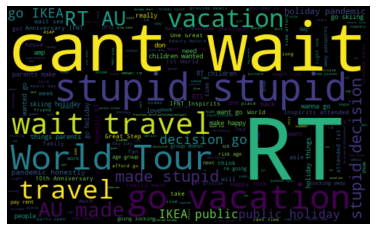

In [5]:
allwords=' '.join([twts for twts in data['Tweets']])
wordcloud=WordCloud(height=300,width=500,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()